In [122]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LinearRegression,RANSACRegressor,LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt

In [123]:
#Loading the dataset using pandas 
auto=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\Automobile_data.csv")
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## EDA 
### Variable Identification
Target column is Price. The goal of the project is to predict the Price of the car based on different parameters related to car.

### Missing Values Treatment

In [124]:
#There are no missing values in dataset
auto.isnull().sum()  

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [125]:
#A lot of columns contain Object type data, convert it into numeric type
auto.dtypes 

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [126]:
#function to eliminate "?" from columns and replace them with mean value of respective columns 
def replace_question_mark_with_mean(col,symbol):
    mean=auto[auto[col]!="?"][col].astype(float).mean()
    auto[col]=auto[col].replace(symbol,mean).astype(float)

In [127]:
#function to eliminate "?" from columns and replace them with mode value of respective columns 
def replace_question_mark_with_mode(col,symbol):
    mean=auto[auto[col]!="?"][col].astype(float).value_counts().idxmax()
    auto[col]=auto[col].replace(symbol,mean).astype(float)

In [128]:
#eliminate "?" from normalized-losses column
replace_question_mark_with_mean("normalized-losses","?")

In [129]:
#Checking value counts of num-of-doors
auto["num-of-doors"].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [130]:
#function to convert numbers in words to numeric e.g. "four" to "4"
from word2number import w2n
def word_to_numbers(col):
    list_col=[]
    for x in list(auto[col]):
        if(x!="?"):
            list_col.append(w2n.word_to_num(x))
        else:
            list_col.append(x)
    auto[col]=list_col

In [131]:
#Convert no of doors in words to numbers
word_to_numbers("num-of-doors")

In [132]:
auto["num-of-doors"].value_counts()

4    114
2     89
?      2
Name: num-of-doors, dtype: int64

In [133]:
#eliminate "?" from num-of-doors column
replace_question_mark_with_mode("num-of-doors","?")

In [134]:
auto["num-of-doors"].value_counts()

4.0    116
2.0     89
Name: num-of-doors, dtype: int64

In [135]:
#Convert no of cylinders in words to numbers
word_to_numbers("num-of-cylinders")

In [136]:
auto["num-of-cylinders"].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [137]:
#eliminate "?" from bore column
replace_question_mark_with_mean("bore","?")

In [138]:
#eliminate "?" from stroke column
replace_question_mark_with_mean("stroke","?")

In [139]:
#eliminate "?" from horsepower column
replace_question_mark_with_mean("horsepower","?")

In [140]:
#eliminate "?" from peak_rpm column
replace_question_mark_with_mean("peak-rpm","?")

In [141]:
#eliminate "?" from price column
replace_question_mark_with_mean("price","?")

In [142]:
#convert num-of-doors and num-of-cylinders into categorical columns
auto["num-of-cylinders"]=auto["num-of-cylinders"].astype('category')
auto["num-of-doors"]=auto["num-of-doors"].astype('category')

In [143]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors         category
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders     category
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

### Univariate Analysis and Bivariate Analysis

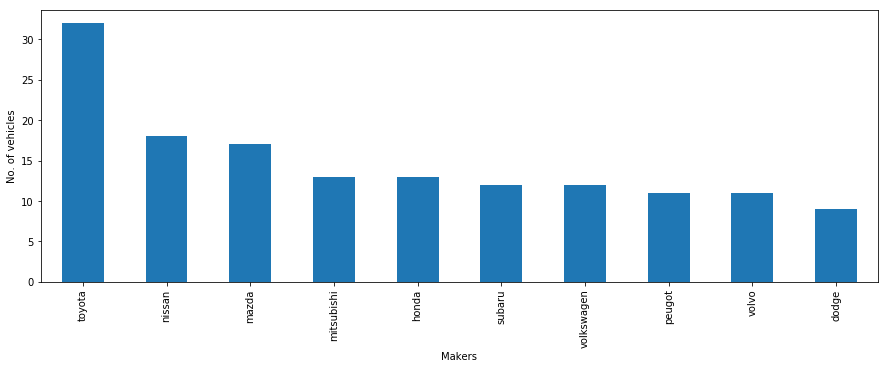

In [144]:
#frequency plot of Top 10 vahicles makers
auto["make"].value_counts().head(10).plot(kind='bar',figsize=(15,5))
plt.xlabel("Makers")
plt.ylabel("No. of vehicles")
plt.show()

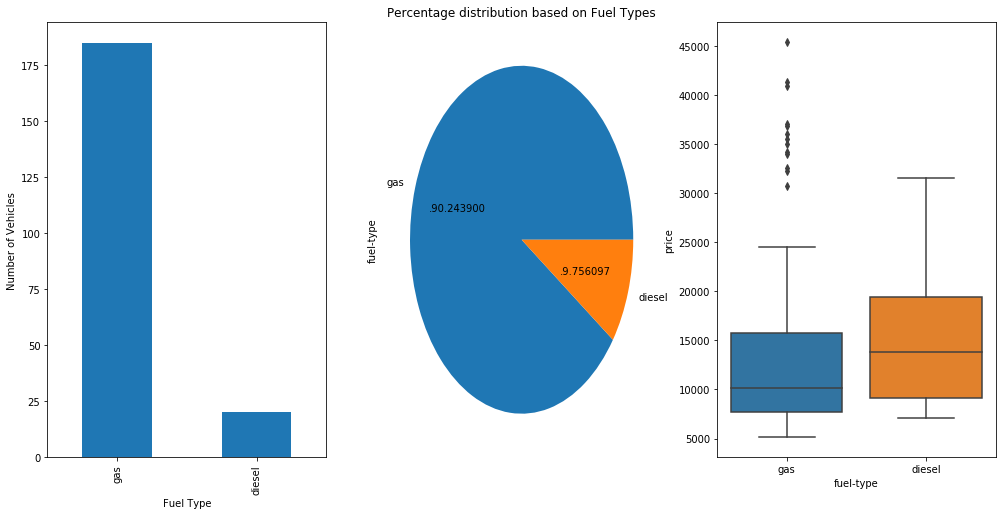

In [145]:
#preferred fuel_type bar plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,8))
auto["fuel-type"].value_counts().plot(kind='bar',ax=ax1)
auto["fuel-type"].value_counts().plot.pie(autopct=".%2f",ax=ax2)
sns.boxplot(x="fuel-type",y="price",data=auto,ax=ax3)
ax1.set_xlabel("Fuel Type")
ax1.set_ylabel("Number of Vehicles")
ax2.set_title("Percentage distribution based on Fuel Types")
plt.show()

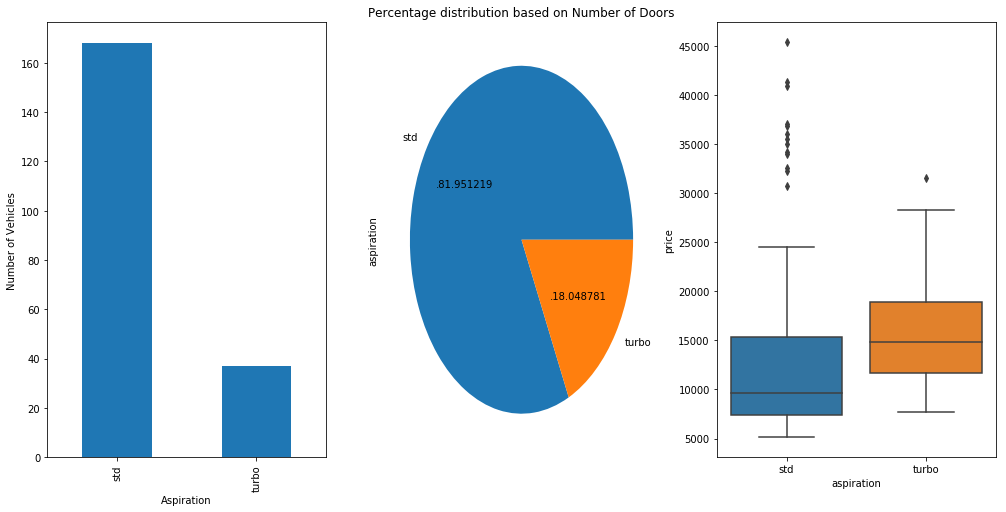

In [146]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,8))
auto["aspiration"].value_counts().plot(kind='bar',ax=ax1)
auto["aspiration"].value_counts().plot.pie(autopct=".%2f",ax=ax2)
sns.boxplot(x="aspiration",y="price",data=auto)
ax1.set_xlabel("Aspiration")
ax1.set_ylabel("Number of Vehicles")
ax2.set_title("Percentage distribution based on Number of Doors")
plt.show()

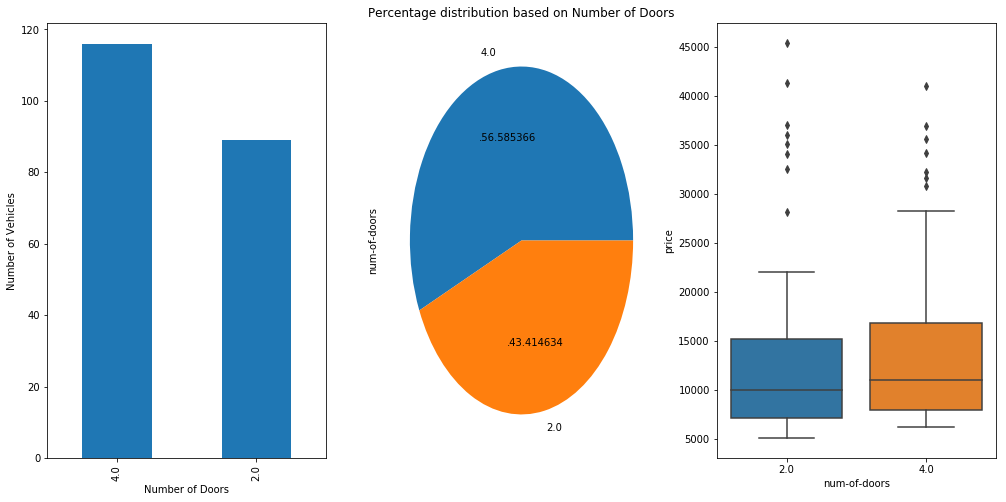

In [147]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,8))
auto["num-of-doors"].value_counts().plot(kind='bar',ax=ax1)
auto["num-of-doors"].value_counts().plot.pie(autopct=".%2f",ax=ax2)
sns.boxplot(x="num-of-doors",y="price",data=auto)
ax1.set_xlabel("Number of Doors")
ax1.set_ylabel("Number of Vehicles")
ax2.set_title("Percentage distribution based on Number of Doors")
plt.show()

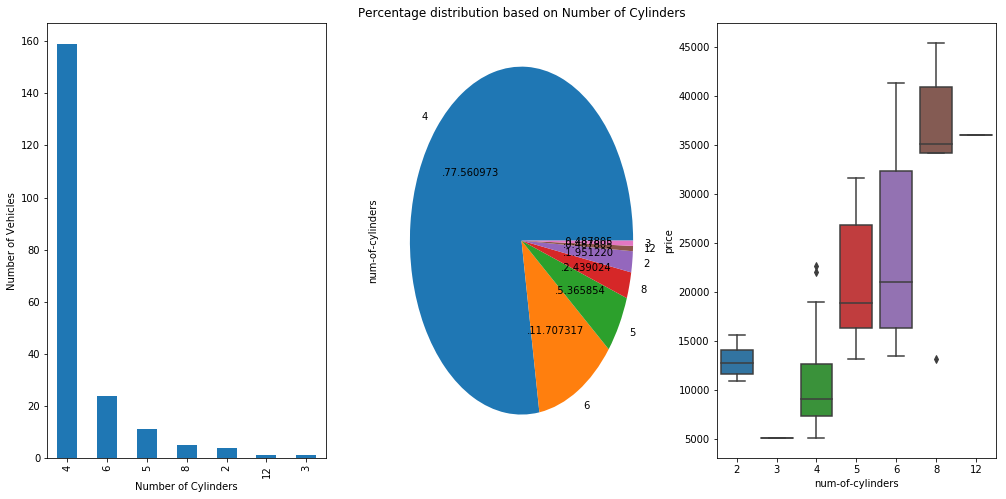

In [148]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(17,8))
auto["num-of-cylinders"].value_counts().plot(kind='bar',ax=ax1)
auto["num-of-cylinders"].value_counts().plot.pie(autopct=".%2f",ax=ax2)
sns.boxplot(x="num-of-cylinders",y="price",data=auto,ax=ax3)
ax1.set_xlabel("Number of Cylinders")
ax1.set_ylabel("Number of Vehicles")
ax2.set_title("Percentage distribution based on Number of Cylinders")
plt.show()

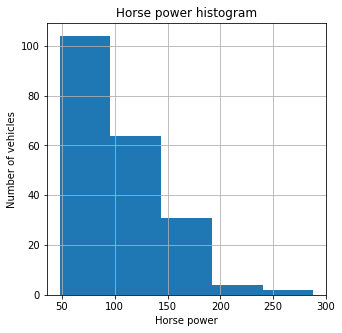

In [149]:
plt.figure(figsize=(5,5))
auto["horsepower"].hist(bins=5)
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power')
plt.show()

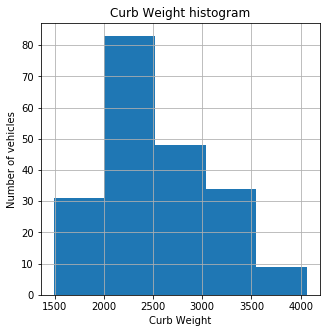

In [150]:
plt.figure(figsize=(5,5))
auto["curb-weight"].hist(bins=5)
plt.title("Curb Weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb Weight')
plt.show()

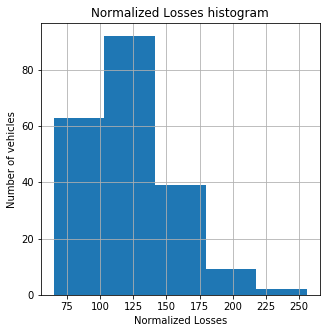

In [151]:
plt.figure(figsize=(5,5))
auto["normalized-losses"].hist(bins=5)
plt.title("Normalized Losses histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized Losses')
plt.show()

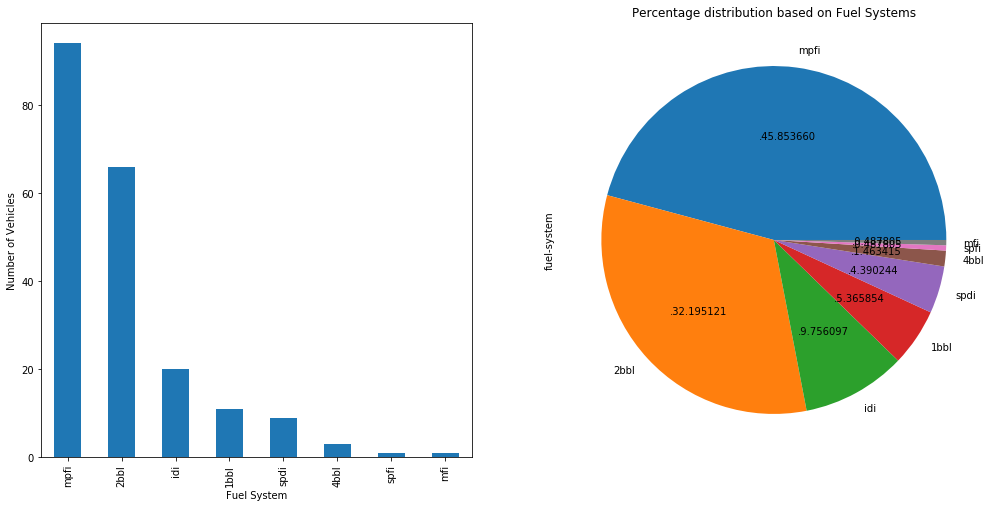

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,8))
auto["fuel-system"].value_counts().plot(kind='bar',ax=ax1)
auto["fuel-system"].value_counts().plot.pie(autopct=".%2f",ax=ax2)
ax1.set_xlabel("Fuel System")
ax1.set_ylabel("Number of Vehicles")
ax2.set_title("Percentage distribution based on Fuel Systems")
plt.show()

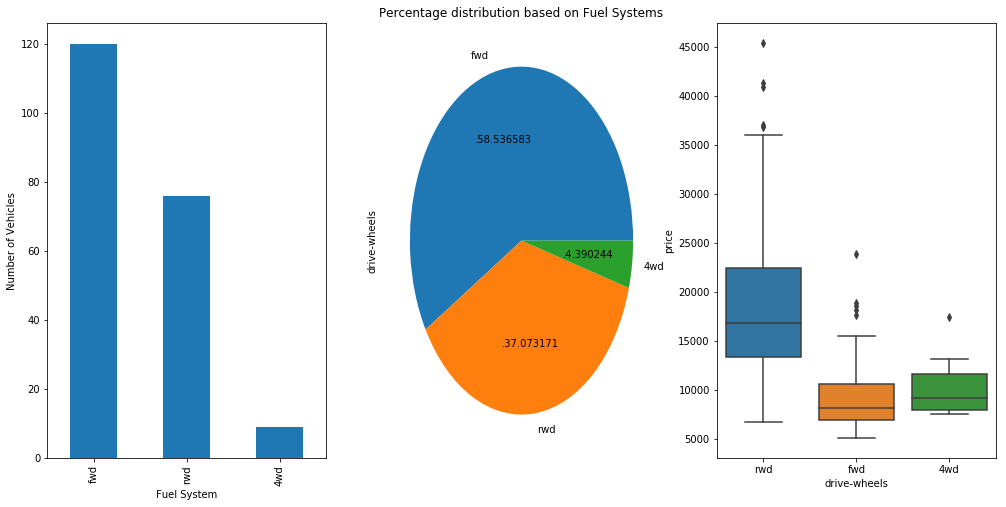

In [153]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,8))
auto["drive-wheels"].value_counts().plot(kind='bar',ax=ax1)
auto["drive-wheels"].value_counts().plot.pie(autopct=".%2f",ax=ax2)
sns.boxplot(x="drive-wheels",y="price",data=auto,ax=ax3)
ax1.set_xlabel("Fuel System")
ax1.set_ylabel("Number of Vehicles")
ax2.set_title("Percentage distribution based on Fuel Systems")
plt.show()

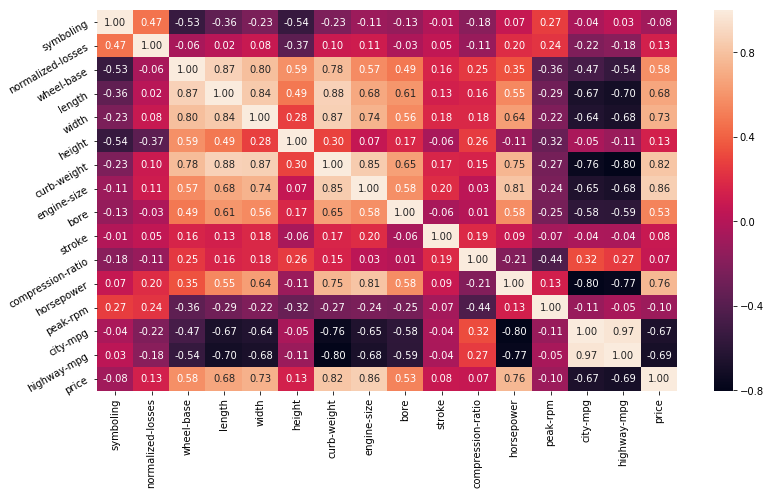

In [154]:
plt.figure(figsize=(13,7))
a = sns.heatmap(auto.corr(), annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

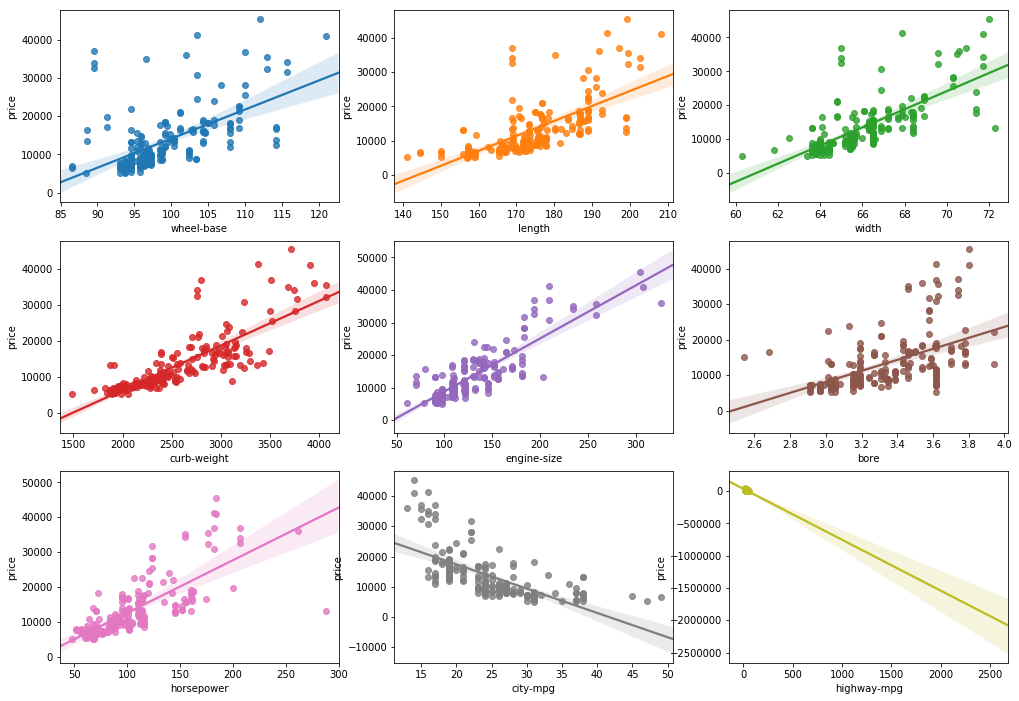

In [155]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))= plt.subplots(3, 3,figsize=(17,12))
sns.regplot('wheel-base','price',auto,ax=ax1)
sns.regplot('length','price',auto,ax=ax2)
sns.regplot('width','price',auto,ax=ax3)
sns.regplot('curb-weight','price',auto,ax=ax4)
sns.regplot('engine-size','price',auto,ax=ax5)
sns.regplot('bore','price',auto,ax=ax6)
sns.regplot('horsepower','price',auto,ax=ax7)
sns.regplot('city-mpg','price',auto,ax=ax8)
sns.regplot('highway-mpg','price',auto,ax=ax9)
plt.show()

### Conclusion/Inferences from EDA
1) Toyato is prefered/trusted brand in Automobile Industry.

2) Gas fuel type is preferred by most of the customers, about 90% people prefer that fuel type. Also Gas fuel type cars are cheaper compared to diesel cars, but few outliers convey that there are few Gas type cars which are expensive as well.

3) +80% people/customers have aspiration towards Standarad cars, as Std cars are way cheaper compared to Turbo cars. Also Std car type consists of few outliers which depicts, that few Standard cars also have higher prices.

4) Since standard cars are prefered over turbo cars, Percentage of 4 door cars is comapritively higher as most of the turbo cars have only 2 doors

5) Since the standard cars are preferred, majority percentage (+75%) cars are desgined with 4 cylinders.

6) Majority of cars fall under low horsepower range as we already know more that 80% people/customers have aspiration towards standard cars which has normal/standard hosrsepower

7) Curb-weight is distributed over 1500-4000 kgs. Cars with 2000-2500 kgs curb-weight are preferred by the customers.

8) Real wheels drive cars are most expensive where front wheel drive cars are least expensive. Four wheel dive cars are slightly more expensive compared front wheel drive cars. Percentage of Real wheel drive cars is comparitively higher which is about (+50%)

9) Wheel Base, Curb Weight, Length of the car, Width of the car, Engine size, Bore, Horsepower has positive correlation with price of the car where as City car mileage and Highway car mileage has inverse/negative relation with price of the car

10) Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

In [156]:
#Converting categorical columns to numerical columns
auto_new=pd.get_dummies(auto)

In [157]:
#Deleting unwanted columns from dataset
auto_new=auto_new.drop(["make_alfa-romero","fuel-type_diesel","aspiration_std","num-of-doors_2.0","body-style_convertible"],1)
auto_new=auto_new.drop(["drive-wheels_fwd","engine-location_front","engine-type_dohc","num-of-cylinders_2","fuel-system_1bbl"],1)

In [158]:
#new shape of the dataset
auto_new.shape

(205, 66)

In [159]:
#Generating Correlation matrix for the dataset
t_corr=auto_new.corr()

In [160]:
#Picking out features haveing correlation co-efficient greater than 0.5
data_corr_d= t_corr[t_corr['price']>0.5].index

In [161]:
data_corr_d

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'price', 'make_mercedes-benz', 'drive-wheels_rwd',
       'fuel-system_mpfi'],
      dtype='object')

In [162]:
#Removing features with multicolinearity
auto_new[data_corr_d].corr()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,price,make_mercedes-benz,drive-wheels_rwd,fuel-system_mpfi
wheel-base,1.000000,0.874587,0.795144,0.776386,0.569329,0.488760,0.351957,0.583168,0.408210,0.498830,0.348891
length,0.874587,1.000000,0.841118,0.877728,0.683360,0.606462,0.554434,0.682986,0.347345,0.538370,0.511374
width,0.795144,0.841118,1.000000,0.867032,0.735433,0.559152,0.642195,0.728699,0.485409,0.511149,0.461896
curb-weight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648485,0.750968,0.820825,0.442556,0.669987,0.520220
engine-size,0.569329,0.683360,0.735433,0.850594,1.000000,0.583798,0.810713,0.861752,0.483128,0.565509,0.483520
bore,0.488760,0.606462,0.559152,0.648485,0.583798,1.000000,0.575737,0.532300,0.205296,0.574082,0.419342
horsepower,0.351957,0.554434,0.642195,0.750968,0.810713,0.575737,1.000000,0.757917,0.214660,0.573220,0.632603
price,0.583168,0.682986,0.728699,0.820825,0.861752,0.532300,0.757917,1.000000,0.524741,0.632103,0.504631
make_mercedes-benz,0.408210,0.347345,0.485409,0.442556,0.483128,0.205296,0.214660,0.524741,1.000000,0.262543,0.016769
drive-wheels_rwd,0.498830,0.538370,0.511149,0.669987,0.565509,0.574082,0.573220,0.632103,0.262543,1.000000,0.448977


In [163]:
#important features using Correlation Heatmap
features=['engine-size','make_mercedes-benz',"fuel-system_mpfi"]

In [164]:
scaler=MinMaxScaler()

In [165]:
cols=list(auto_new)

In [166]:
auto_scaled=pd.DataFrame(scaler.fit_transform(auto_new))

In [167]:
auto_scaled.columns=cols

In [168]:
#Scaled Dataset using MinMaxScaler
auto_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_6,num-of-cylinders_8,num-of-cylinders_12,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## KNN Regressor

In [169]:
#Division of Dependent/traget and Independent variable 
X=auto_scaled.drop(["price"],1)
y=auto["price"]

In [170]:
#Defining parameters using dictionary for GridSearchCV
parameters={'n_neighbors':np.arange(3,12),'metric':['cosine','jaccard','manhattan','euclidean','minkowski']}

In [171]:
#Initializing an estimator for GridSearchCV
knn=KNeighborsRegressor()

In [172]:
#Applying GridSearchCV on knn estimator
clf=GridSearchCV(knn,parameters,cv=5)

In [173]:
#Fitting Train data on GridSearchCV best model
clf.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'metric': ['cosine', 'jaccard', 'manhattan', 'euclidean', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### KNN Regressor performs best when K value is "5" and distance metric is "Manhattan" for a given dataset

In [174]:
#finding out best paramters 
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [175]:
n=auto.shape[0]
k=auto.shape[1]-1

In [176]:
#Calculating R-Squared score of best estimator
r2=clf.score(X,y)
adj_r2=1-(((1-r2)*(n-1))/(n-k-1))

In [177]:
print("R Squared: ",r2)
print("Adjusted R Squared: ",adj_r2)

R Squared:  0.904279947051
Adjusted R Squared:  0.890911224572


#### Accuracy Score: 89.09%

## Linear Regression (using Filter Method)

In [178]:
#Splitting into target/dependent and independent variables
X=auto_scaled[features]
y=auto["price"]

In [179]:
len(features)

3

In [180]:
#Spliting into train and test
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=6)

In [181]:
#Initializing a Linear Regression Model
lin=LinearRegression()

In [182]:
#Fitting Linear Regression model on Train dataset
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
#Predicting the values for Test/validation set
y_pred=lin.predict(X_test)

In [184]:
#Calculating R-Squared and Adjusted R-Squared value
r2=r2_score(y_test,y_pred)
adj_r2=1-(((1-r2)*(n-1))/(n-3-1))

In [185]:
print("R Squared: ",r2)
print("Adjusted R Squared: ",adj_r2)

R Squared:  0.747729400633
Adjusted R Squared:  0.743964167807


In [186]:
y_pred=lin.predict(X)
error=y-y_pred

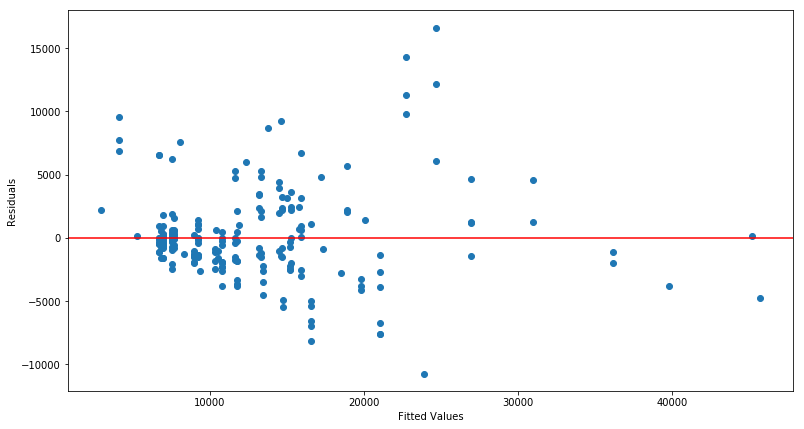

In [187]:
#Heteroscedasticity checking
plt.figure(figsize=(13,7))
plt.scatter(y_pred,error)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0,color='red')
plt.show()

#### Accuracy Score: 74.39%

## Linear Regression (using Backward Elimination)

In [188]:
#Splitting into target/dependent and independent variables
X=auto_scaled.drop(["price"],1)
y=auto["price"]

In [189]:
#function to get important features using Backward Elimination
cols = list(X.columns)
pmax = 1
while (pmax>0.05):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        breakselected_features_BE = cols
print("Best features using Backward Elimination: ",cols)

Best features using Backward Elimination:  ['length', 'width', 'curb-weight', 'engine-size', 'bore', 'peak-rpm', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_mazda', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_renault', 'make_subaru', 'make_toyota', 'make_volkswagen', 'aspiration_turbo', 'body-style_hatchback', 'engine-location_rear', 'engine-type_dohcv', 'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'num-of-cylinders_3', 'num-of-cylinders_8']


In [190]:
print("Number of features choosen using Backward Elimination: ",len(cols))

Number of features choosen using Backward Elimination:  29


In [191]:
#Splitting the target and independent variables based on Backward Elimination
X=auto_scaled[cols]
y=auto["price"]

In [192]:
#Train-Test splitting
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=6)

In [193]:
#initializing Linear Regression Model
lin_reg=LinearRegression()

In [194]:
#Fitting Linear Regression on Train dataset
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [195]:
#Calculating R-Squared and Adjusted R-Squared value
r2=lin_reg.score(X_test,y_test)
adj_r2=1-(((1-r2)*(n-1))/(n-29-1))

In [196]:
print("R Squared: ",r2)
print("Adjusted R Squared: ",adj_r2)

R Squared:  0.922579358844
Adjusted R Squared:  0.909749652596


In [197]:
#Calculating erorr for the entire dataset
y_pred=lin_reg.predict(X)
error=y-y_pred

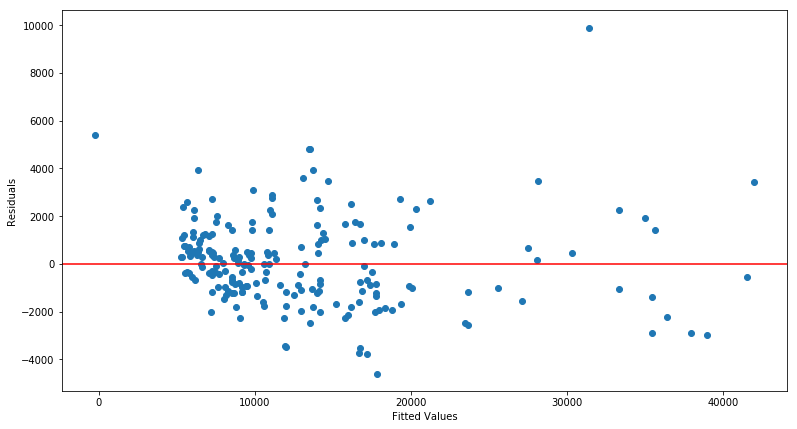

In [198]:
#Fitted Values vs Error graph to check Heteroscedasticity
plt.figure(figsize=(13,7))
plt.scatter(y_pred,error)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0,color='red')
plt.show()

#### Accuracy Score: 90.97%

## Linear Regression (Using RFE: Recursive Feature Elimination)

In [199]:
#Initializing a Linear Regression Model
model=LinearRegression()

In [200]:
X_RFE=auto_new.drop(["price"],1)
y_RFE=auto["price"]

In [201]:
#Initializing a RFE Model with estimator and number of top ranked features required
rfe=RFE(model,30)

In [202]:
X_t= rfe.fit_transform(X_RFE,y_RFE)

In [203]:
#Train-Test split
X_train,X_test,y_train,y_test=tts(X_t,y_RFE,test_size=0.3,random_state=0)

In [204]:
#Initializing a Linear Regression Model
lin_RFE=LinearRegression()

In [205]:
#Fitting Linear Regression Model on Train data
lin_RFE.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
#Calculation of R-Squared and Adj-R-Squared
r2=lin_RFE.score(X_test,y_test)
adj_r2=1-(((1-r2)*(n-1))/(n-30-1))

In [207]:
print("R Squared: ",r2)
print("Adjusted R Squared: ",adj_r2)

R Squared:  0.689554375752
Adjusted R Squared:  0.636029268123


In [208]:
#Separating Features as per ranking 
fs= RFE(model, 30, step=1)
fs= fs.fit(X_RFE,y_RFE)
ranks=fs.ranking_

feature_indexes=[]
for i in range(len(ranks)):
    if ranks[i]==1:
        feature_indexes+=[i]

In [209]:
dataset=list(auto_new)
top_30_feature_by_RFE=[]
for i in feature_indexes:
    top_30_feature_by_RFE.append(dataset[i])

In [210]:
#List of features choosen by ranking using RFe
top_30_feature_by_RFE

['width',
 'compression-ratio',
 'make_audi',
 'make_honda',
 'make_isuzu',
 'make_mazda',
 'make_mercury',
 'make_nissan',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_volvo',
 'num-of-doors_4.0',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'drive-wheels_4wd',
 'drive-wheels_rwd',
 'engine-location_rear',
 'engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_rotor',
 'num-of-cylinders_5',
 'num-of-cylinders_6',
 'num-of-cylinders_8',
 'fuel-system_2bbl',
 'fuel-system_4bbl',
 'fuel-system_spdi']

#### Accuracy Score: 63.60%

## Linear Regression (using Elastic Net)

In [211]:
#Initializing a model for ElasticNet cross validation
elastic_reg=ElasticNetCV()

In [212]:
#Defining target and independent variables
X=auto_new.drop(['price'],1)
y=auto['price']

In [213]:
#Fitting ElasticNetCV model on X and y
elastic_reg.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [214]:
#Score calculation for checking goodenss of the model
elastic_reg.score(X,y)

0.71644893938103127

In [215]:
#L1-ratio for best estimator
print("Value of L1-ratio: ",elastic_reg.l1_ratio)

Value of L1-ratio:  0.5


In [216]:
coef=pd.Series(elastic_reg.coef_, index=X.columns)

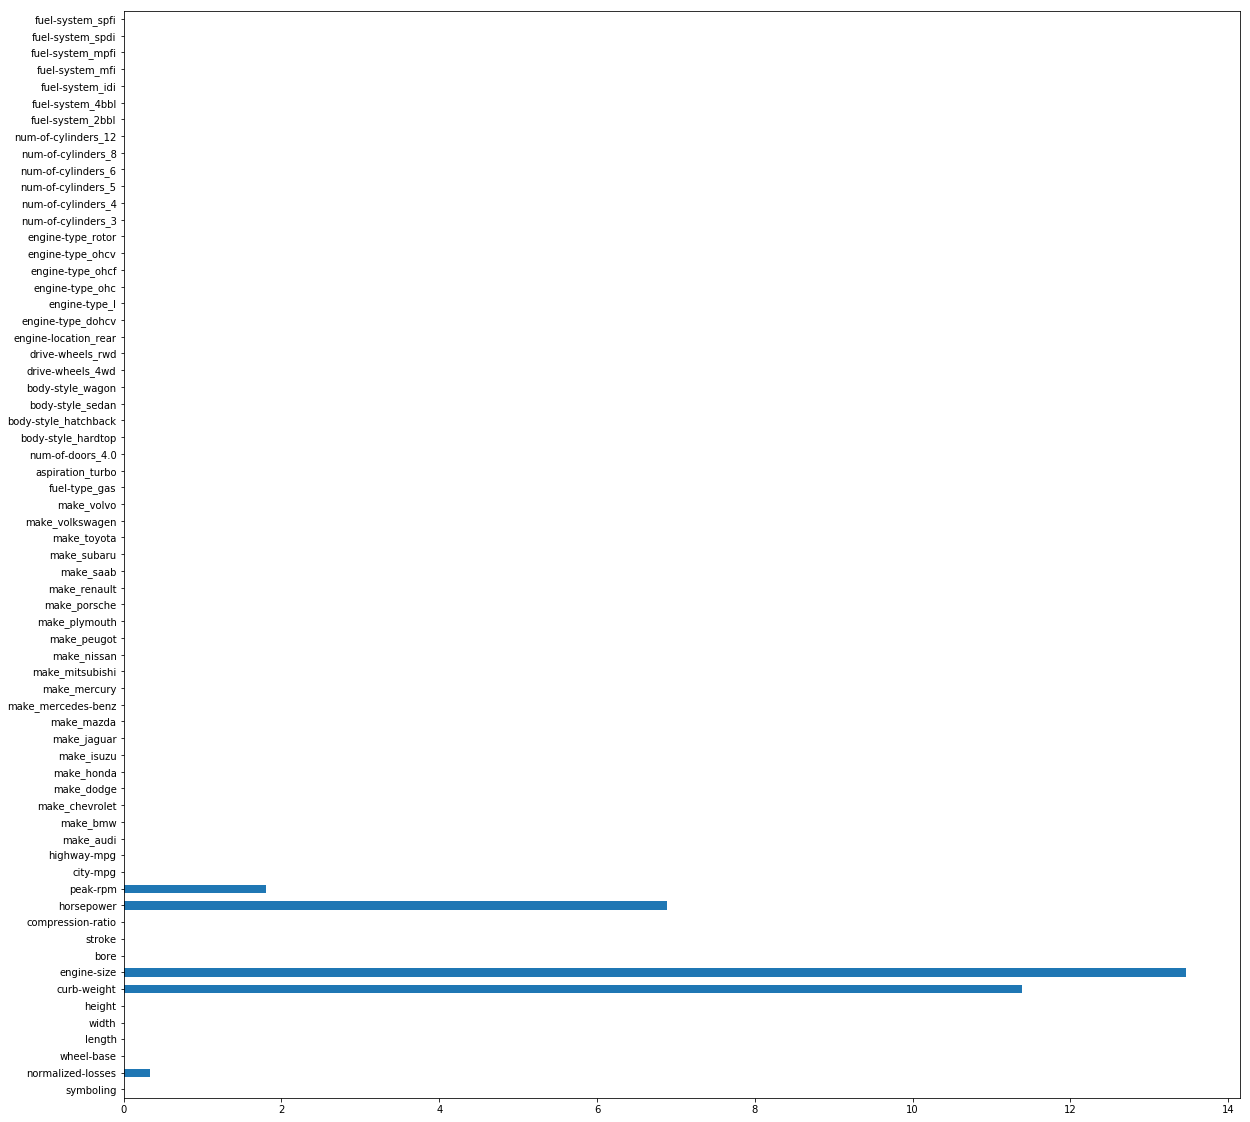

In [217]:
#Plotting the graph based on importance of features
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
coef.plot(kind='barh')
plt.show()

In [218]:
#Features selection using Elastic Net Cross Validation
features_en=["peak-rpm","horsepower","engine-size","curb-weight","normalized-losses"]

In [219]:
#Divinding the dataset into target and independent variables based on important features chosen based on Elastic Net method
X=auto_new[["peak-rpm","horsepower","engine-size","curb-weight","normalized-losses"]]
y=auto["price"]

In [220]:
#Train and Test split
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=6)

In [221]:
#Initializing a Linear Regression Model
model=LinearRegression()

In [222]:
#Fitting the model on Train Dataset
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [223]:
#Calculation of R-Squared and Adjusted R squared 
r2=model.score(X_test,y_test)
adj_r2=1-(((1-r2)*(n-1))/(n-5-1))

In [224]:
print("R Squared: ",r2)
print("Adjusted R Squared: ",adj_r2)

R Squared:  0.777782448494
Adjusted R Squared:  0.772199092928


In [225]:
y_pred=model.predict(X)
error=y-y_pred

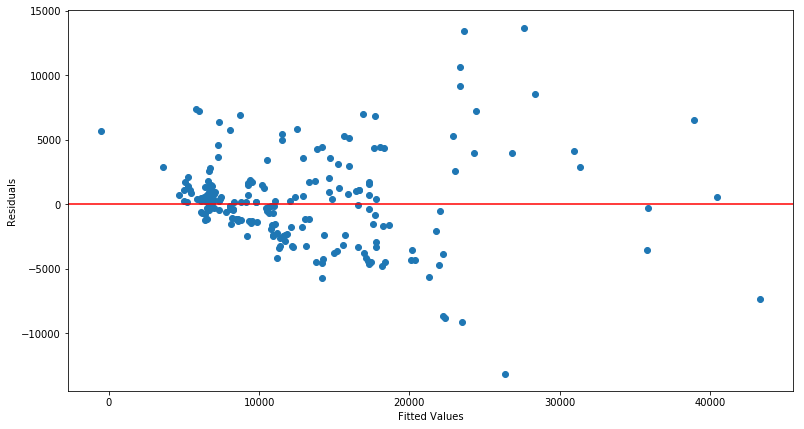

In [226]:
#Fitted Values vs Error graph to check Heteroscedasticity
plt.figure(figsize=(13,7))
plt.scatter(y_pred,error)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0,color='red')
plt.show()

#### Accuracy Score: 77.21%

## RANdom SAmple Consensus (RANSAC Algorithm)

In [227]:
#Division Independent variables and Dependent variable (Target variable)
X=auto_new.drop(['price'],1)
y=auto["price"]

In [228]:
#Initialize Normal Linear Regression Model
normal_lin=LinearRegression()

In [229]:
#Fitting Normal Linear Regression Model in X and y
normal_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [230]:
#Score of Normal Linear Regression Model
normal_lin.score(X,y)

0.96087023269604754

In [231]:
#Intercept for line of best fit in Noraml Linear Regression
normal_lin.intercept_

-40245.720111123926

In [232]:
#Co-efficients using Normal Linear Regression
normal_lin.coef_

array([ -5.31899350e+01,  -2.90526617e+00,   2.53179445e+02,
        -1.56582736e+02,   8.52513156e+02,  -2.55474597e+02,
         5.94623023e+00,   1.02514921e+02,  -3.51200746e+03,
        -1.09848104e+03,  -6.61014912e+02,  -7.70586984e+00,
         2.59750478e+00,   1.67604908e+01,   9.28755457e+01,
        -7.41678382e+02,   5.29440327e+03,  -5.77241733e+03,
        -6.27860429e+03,  -3.59715723e+03,  -8.71194794e+02,
        -2.43765290e+03,  -3.09493731e+03,   1.58467430e+03,
        -3.80543115e+03,  -6.67450959e+03,  -3.63202883e+03,
        -5.58241446e+03,  -6.23580534e+03,   2.47588792e+03,
        -4.66629482e+03,   5.92368476e+02,  -5.31906798e+03,
        -3.99655302e+03,  -3.26179131e+03,  -2.94902584e+03,
        -4.96111376e+03,   1.94067366e+03,   1.26536126e+02,
        -2.23631787e+03,  -3.09650043e+03,  -2.13725264e+03,
        -2.30141413e+03,  -2.86487740e+02,   2.91039740e+02,
         8.11920979e+03,  -2.11623800e+04,  -1.72588156e+02,
         7.53282283e+02,

In [233]:
#Initializing RANSAC Linear Regression Model
ransac=RANSACRegressor(LinearRegression())

In [234]:
#Fitting RANSAC Model in X and y
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [235]:
#Score calculation using RANSAC Algorithm
ransac.score(X,y)

0.82784129125309347

In [236]:
#Co-efficients of Independent Variables using RANSAC Regressor
ransac.estimator_.coef_

array([  5.79850597e+01,   2.51189711e+00,  -1.54243969e+01,
        -7.39995234e+01,   3.60731241e+02,  -4.14241046e+02,
         1.35071296e+01,  -4.64188820e+01,  -4.09762218e+03,
         2.12040861e+03,   4.57573792e+02,  -9.37211868e+00,
        -3.66192636e-01,  -7.92179189e+01,   8.44977179e+01,
         1.42784584e+03,   8.63393562e+03,  -1.63451987e+03,
        -3.89567838e+03,  -1.37762783e+03,  -1.88193060e+03,
         6.92262066e+03,  -8.57096212e+02,   6.65691556e+03,
         1.80030635e+03,  -4.20640144e+03,  -3.49103018e+01,
        -9.05176863e+02,  -4.03281925e+03,   7.86470902e+03,
        -3.18932747e+03,   1.13404214e+03,  -5.66005896e+03,
        -1.49530141e+03,  -1.44041214e+03,   2.56261820e+03,
         4.05206235e+03,   1.75563078e+03,   2.43886917e+02,
        -3.10577954e+03,  -2.94072961e+03,  -2.70569416e+03,
        -3.61451275e+03,  -2.25480622e+02,  -4.47202537e+02,
         1.03646090e+04,  -3.63797881e-12,  -9.05176863e+02,
        -1.43372240e+03,

In [237]:
#Intercept of RANSAC regression line
ransac.estimator_.intercept_

1492.2400011598238

In [238]:
#False in following array depicts outliers
ransac.inlier_mask_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

#### Accuracy Score: 83.64%

In [239]:
#Calculating mean of Price of Cars
mean=auto["price"].mean()

In [240]:
#If price of car is greater than equal to mean classified as "High" otherwise "Low"
price_range=[]
for x in list(auto_new["price"]):
    if(x >= mean):
        price_range.append("High")
    else:
        price_range.append("Low")

In [241]:
#Creating new column in the dataset
auto_new["price_range"]=price_range

In [242]:
auto_new["price_range"].value_counts()

Low     127
High     78
Name: price_range, dtype: int64

In [243]:
#Dropping old price column
auto_new=auto_new.drop(["price"],1)

In [244]:
auto_new.shape

(205, 66)

In [245]:
log_cols=list(auto_new)

In [246]:
#Label Encoding the new price range column
auto_new["price_range"]=auto_new["price_range"].astype("category")
d=dict(enumerate(auto_new["price_range"].cat.categories))
auto_new["price_range"]=auto_new["price_range"].cat.codes
print(d)

{0: 'High', 1: 'Low'}


#### All the above steps are done to convert the regression problem to classification problem in order to apply Logistic Regression 

In [247]:
#Scaled the newly generated dataset using MinMaxScaler
new_auto_scaled=pd.DataFrame(scaler.fit_transform(auto_new))

In [248]:
new_auto_scaled.columns=log_cols

In [249]:
new_auto_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_8,num-of-cylinders_12,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price_range
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## KNN Classification

In [250]:
#Defining Target and Independent variables for KNN Classification
X=new_auto_scaled.drop(["price_range"],1)
y=auto_new["price_range"]

In [251]:
#Initializing a KNN Classifier model
knn_class=KNeighborsClassifier()

In [252]:
#Defining parameters for KNN Classification GridSearchCV
class_param={'n_neighbors':np.arange(3,12),'metric':['cosine','jaccard','manhattan','euclidean','minkowski']}

In [253]:
#Applying GridSearchCV on for KNN Classification
clf=GridSearchCV(knn_class,class_param,cv=5)

In [254]:
#Fitting the best model on X and y
clf.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'metric': ['cosine', 'jaccard', 'manhattan', 'euclidean', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### KNN Classification Model performs best when K value is "7" and distance metric is "Manhattan" for a given dataset

In [255]:
#Paramters of best estimator found out using GridSearchCV
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [256]:
#Calulating the Accuracy score of KNN classification model
acc=clf.score(X,y)

In [257]:
print("Accuracy Score: ",acc)

Accuracy Score:  0.907317073171


#### Classification Accuracy Score ( KNN Classification): 90.73%

## Logistic Regression

In [258]:
#Initializing a Logistic Regression Model
log_reg=LogisticRegression()

In [259]:
#Defining Target and Independet variables for Logistic Regression Model
X=new_auto_scaled.drop(["price_range"],1)
y=auto_new["price_range"]

In [260]:
#Train-Test split 
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=6)

In [261]:
#Fitting Logistic Regression Model on Train dataset
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [262]:
#Predicting the values for test set
y_pred=log_reg.predict(X_test)

In [263]:
#Calculating Accuracy score for Logistic Regression Model
accuracy_score(y_test,y_pred)

0.91935483870967738

In [264]:
#Confusion Matrix for Performance Evaluation of Logistic Regression
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.88      0.90        26
          1       0.92      0.94      0.93        36

avg / total       0.92      0.92      0.92        62



#### Classification Accuracy Score (Logistic Regression): 91.93%